<a href="https://colab.research.google.com/github/SmurZik/Telecom/blob/main/lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Упражнение 2.1
Посмотреть с помощью chap02.ipynb примеры и пояснения.

# Упражнение 2.2
Пилообразный сигнал линейно нарастает от -1 до 1, а затем резко падает до -1 и повторяется. См. https://en.wikipedia.org/wiki/Sawtooth_wave

Напишите класс, называемый SawtoothSignal, расширяющий signal и предоставляющий evaluate для оценки пилообразного сигнала.

Вычислите спектр пилообразного сигнала. Как соотносится его гармоническая структура с треугольным и прямоугольным сигналами?

Импорт библиотек и файлов:

In [1]:
import os
if not os.path.exists('thinkdsp.py'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py

from thinkdsp import Sinusoid, unbias, normalize, TriangleSignal, SquareSignal

--2024-03-08 18:05:13--  https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/AllenDowney/ThinkDSP/master/code/thinkdsp.py [following]
--2024-03-08 18:05:13--  https://raw.githubusercontent.com/AllenDowney/ThinkDSP/master/code/thinkdsp.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 48574 (47K) [text/plain]
Saving to: ‘thinkdsp.py’

thinkdsp.py         100%[===================>]  47.44K  --.-KB/s    in 0.002s  

2024-03-08 18:05:13 (24.5 MB/s) - ‘thinkdsp.py’ saved [48574/48574]



Напишем класс SawtoothSignal, расширяющий signal и предоставляющий evaluate для оценки пилообразного сигнала. Будем расширять класс Sinusoid, так как этот класс уже написан в оригинальном ThinkDSP, и он сам расширяет signal, тем самым не придётся реализовывать уже написанные методы:

In [2]:
from thinkdsp import Sinusoid
from thinkdsp import normalize, unbias
import numpy as np

class SawtoothSignal(Sinusoid):

    def evaluate(self, ts):
        cycles = self.freq * ts + self.offset / np.pi / 2
        frac, _ = np.modf(cycles)
        ys = normalize(unbias(frac), self.amp)
        return ys

Теперь создадим пилообразный сигнал

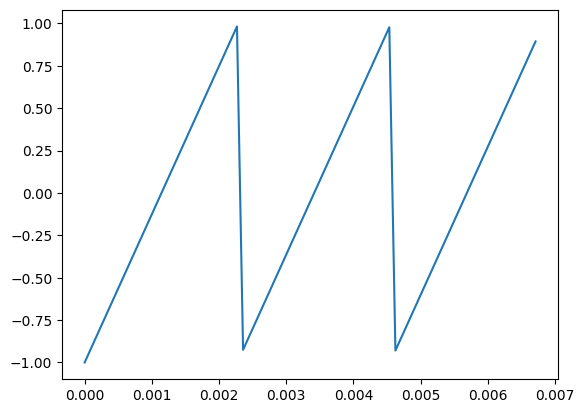

In [5]:
sawtooth = SawtoothSignal()
sawtooth.plot()
sawtooth.make_wave(duration=0.5, framerate=40000).make_audio()

Выведем его спектограмму:

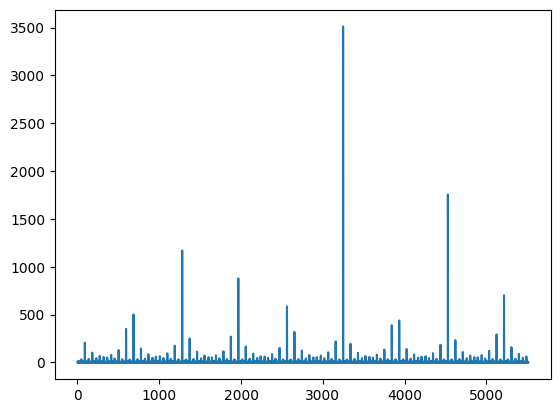

In [6]:
sawtooth = saw_tooth_signal.make_wave().make_spectrum()
sawtooth.plot()

Сравним данный сигнал с треугольным

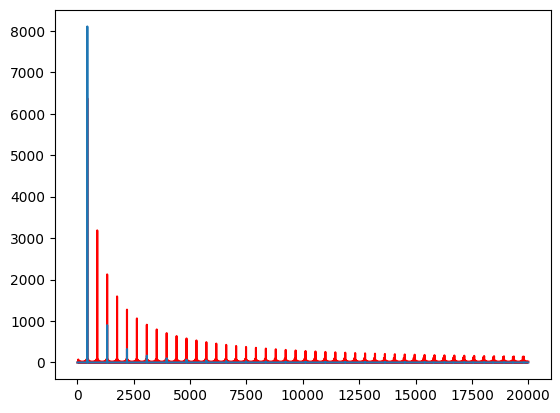

In [17]:
sawtooth = SawtoothSignal().make_wave(duration=0.5, framerate=40000)
sawtooth.make_spectrum().plot(color='red')
triangle = TriangleSignal().make_wave(duration=0.5, framerate=40000)
triangle.make_spectrum().plot()
triangle.make_audio()

Если сравнивать с треугольным сигналом, то частоты пилообразного сигнала понижаются более плавно. Амплитуда у пилообранзного сигнала обратна пропорциональна частоте, а у треугольного сигнала пропорциональна квадрату частоты. Также у треугольного сигнала присутствуют только нечетные гармоники

Также сравним пилообразный сигнал с прямоугольным сигналом

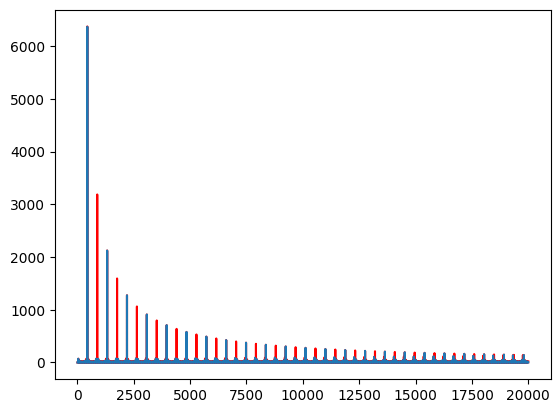

In [18]:
sawtooth.make_spectrum().plot(color='red')
square = SquareSignal(amp=0.5).make_wave(duration=0.5, framerate=40000)
square.make_spectrum().plot()
square.make_audio()

У прямоугольного сигнала график довольно схож с пилообразным. Стоит отметить, что амплитуда у прямоугольного сигнала больше, поэтому пришлось уменьшить ее в два раза. У прямоугольного сигнала также как и у треугольного присутствуют только нечетные гармоники

# Упражнение 2.3
Создайте прямоугольный сигнал 1100 Гц и вычислите wave с выборками 10 000 кадров в секунду. Постройте спектр и убедитесь, что большинство гармоник "завернуты" из-за биений. Слышны ли последствия этого при проигрывании?

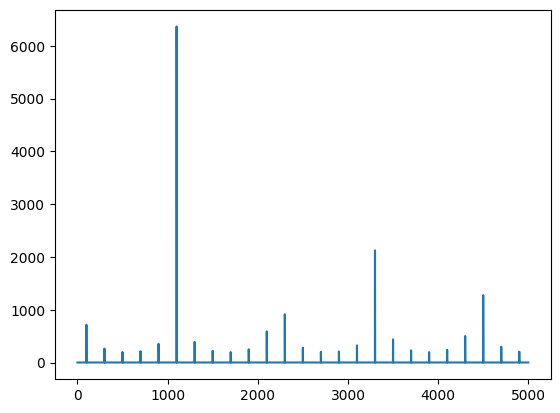

In [19]:
square = SquareSignal(freq=1100)
square_wave = square.make_wave(duration = 1, framerate = 10000)
square_spectrum = square_wave.make_spectrum()
square_spectrum.plot()

Для удобства посмотрим пики частот:

In [21]:
square_spectrum.peaks()[:5]

[(6367.182534102138, 1100.0),
 (2125.0234754609446, 3300.0),
 (1278.179301804898, 4500.0),
 (916.3945635352014, 2300.0),
 (716.3133230172565, 100.0)]

Можем заметить, что:


*   3 гармоника должна быть на частоте 5500, но мы видим ее на частоте 4500, это связанно с заверткой на частоте 5000;
*   4 гармоника должна быть на частоте 7700, после 5500 частоты мы оказались на 4500. У нас осталось еще 7700 - 5500 = 2200. Вычитаем 4500 - 2200 = 2300. И видим что дейстивтельно четвертая гармоника находится на 2300;


*   5 гармоника из за биений оказалась на частоте 100 и стала основной, вместо 1100.







Для сравнения послушаем более приближенный звук, который должен получиться при прямоугольном сигнале в 1100 Гц. Для этого увеличим выборку в 4 раза

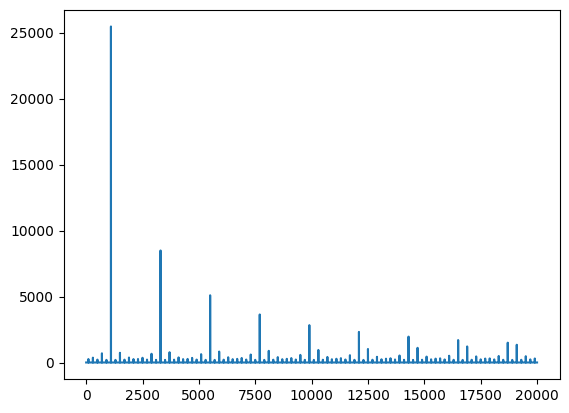

In [22]:
square_signal_wave_x4 = square.make_wave(duration = 1, framerate = 40000)
square_signal_wave_x4.make_spectrum().plot()

Можем заметить, что в полученном сигнале биения намного меньше влияют. Послушаем данный звук и звук, который мы сделали по заданию.

Звук по заданию:

In [23]:
square_wave.make_audio()

Полученный звук:

In [24]:
square_signal_wave_x4.make_audio()

Можем услышать существенную разницу.

# Упражнение 2.4
Возьмите объект Spectrum и распечатайте несколько первых значений spectrum.fs. Убедитесь, что они начинаются с нуля, то есть Spectrum.hs[0] - амплитуда компоненты с частотой 0. Но что это значит?

Проведите такой эксперимент:



1.   Создайте треугольный сигнал с частотой 440 Гц и wave длительностью 0,01 секунд. Распечатайте сигнал.
2.  Создайте объект Spectrum и распечатайте Spectrum.hs[0]. Каковы амплитуда и фаза этого компонента?
3.  Установите Spectrum.hs[0] = 100. Как эта операция повлияет на сигнал? Подсказка: Spectrum дает метод, называемый make_wave, вычисляющий wave, соответствующий Spectrum.

Выполним действия, описанные в первом пункте:

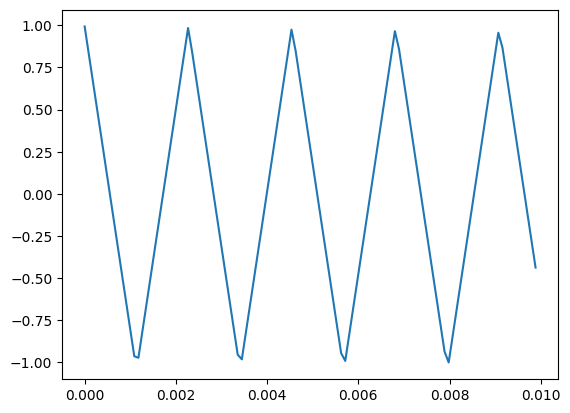

In [25]:
triangle_signal = TriangleSignal(freq=440)
triangle_signal_wave = triangle_signal.make_wave(duration = 0.01)
triangle_signal_wave.plot()

Послушам получившийся сигнал:

In [26]:
triangle_signal_long_wave = triangle_signal.make_wave(duration = 0.5)
triangle_signal_long_spectrum = triangle_signal_long_wave.make_spectrum()
triangle_signal_long_wave.make_audio()

Выполним требуемые во 2 пункте действия:

In [27]:
triangle_signal_wave_spectrum = triangle_signal_wave.make_spectrum()
triangle_signal_wave_spectrum.hs[0]

(1.0436096431476471e-14+0j)

3-й пункт:

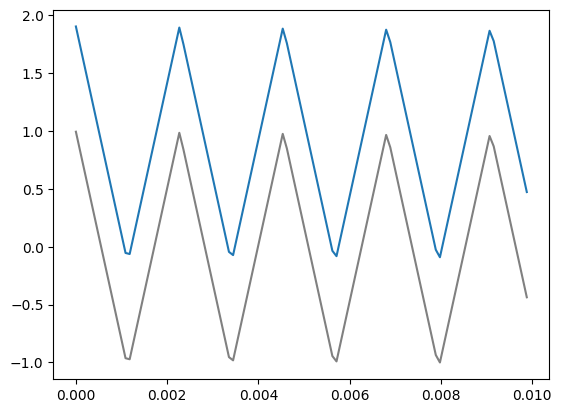

In [28]:
triangle_signal_wave_spectrum.hs[0] = 100
triangle_signal_wave.plot(color='gray')
triangle_signal_wave_spectrum.make_wave().plot()

Послушаем получившийся звук:

In [29]:
triangle_signal_long_spectrum.hs[0] = 5000
triangle_signal_long_wave = triangle_signal_long_spectrum.make_wave()
triangle_signal_long_wave.make_audio()

Слышно, что звук стал немного тише. Чем больше будет число, которое мы приравниваем к Spectrum.hs[0], тем тише будет звук. Это говорит о том, что нулевой элемент отвечает за смешение. Как и видно из спектрограммы - звук сместился вверх.

# Упражнение 2.5
Напишите функцию, принимающую Spectrum как параметр и изменяющую его делением каждого элемента hs на соответсвующую частоту из fs. Подсказка: поскольку деление на ноль не определено, надо задать Spectrum.hs[0] = 0.

Проверьте эту функцию, используя прямоугольный, треугольный или пилообразный сигналы:
1. Вычислите Spectrum и распечатайте его.
2. Измените Spectrum, вновь используя свою функцию, и распечатайте его.
3. Используйте Spectrum.make_wave, чтобы сделать wave из измененного Spectrum, и прослушайте его. Как эта операция повлияла на сигнал?

Для начала напишем функцию:

In [32]:
def make_spectrum_fileter(spectrum):
    spectrum.hs[0] = 0
    spectrum.hs[1:] /= spectrum.fs[1:]

Выполним 1-й пункт из задания, используя треугольный сигнал.

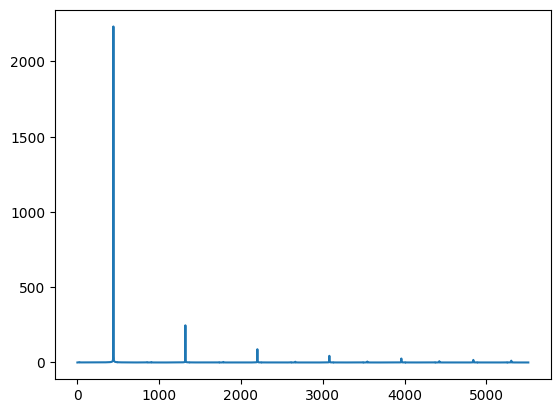

In [30]:
triangle_signal_wave = TriangleSignal().make_wave(duration = 0.5)
triangle_signal_spectrum = triangle_signal_wave.make_spectrum()
triangle_signal_spectrum.plot()
triangle_signal_wave.make_audio()

Выполним 2-й и 3-й пункты:

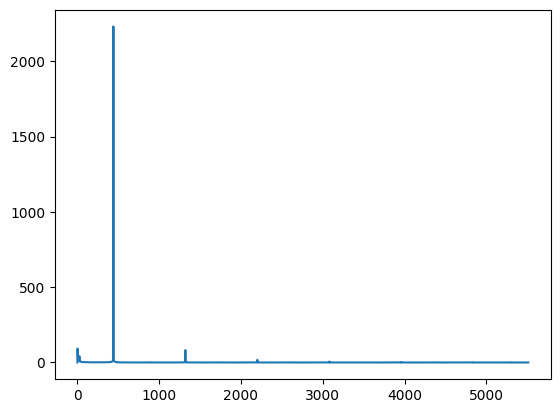

In [33]:
make_spectrum_fileter(triangle_signal_spectrum)
triangle_signal_wave = triangle_signal_spectrum.make_wave()
triangle_signal_spectrum.scale(440)
triangle_signal_spectrum.plot()
triangle_signal_wave.make_audio()

Как мы можем видеть, высокие частоты сильно порезались, но основные гармоники остались, только чем больше они по высоте, тем меньше влияют на сигнал, что логично следует из нашей функции.

# Упражнение 2.6
У треугольных и прямоугольных сигналов есть только нечентые гармоники; в пилообразном сигнале есть и четные, и нечетные гармоники. Гармоники прямоугольных и пилообразных сигналов уменьшаются пропорционально 1/f; гармоники треугольных сигналов - пропорционально 1/f^2. Можно ли найти сигнал, состоящий из четных и нечетных гармоник, совпадающих пропорционально 1/f^2?

Подсказка: для этого есть два способа. Можно собрать желаемый сигнал из синусоид, а можно взять сигнал со спектром похожим на необходимый, и изменять его параметры.

Чтобы решить задачу, возьмем пилообразный сигнал и поделим каждую амплитуду на герцовку.

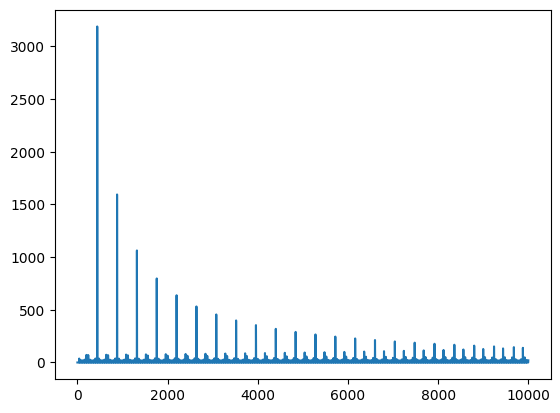

In [34]:
freq=440
saw_tooth_signal = SawtoothSignal(freq=freq)
saw_tooth_signal_wave = saw_tooth_signal.make_wave(duration = 0.5, framerate = 20000)
saw_tooth_signal_spectrum = saw_tooth_signal_wave.make_spectrum()
saw_tooth_signal_spectrum.plot()
saw_tooth_signal_wave.make_audio()

Рассмотрим поближе

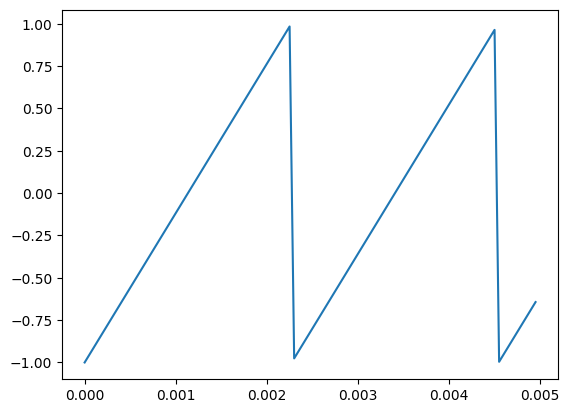

In [35]:
saw_tooth_signal_wave.segment(duration = 0.005).plot()

Используем нашу функцию, написанную в предыдущем пункте, чтобы поделить каждую амплитуду на герцовку.

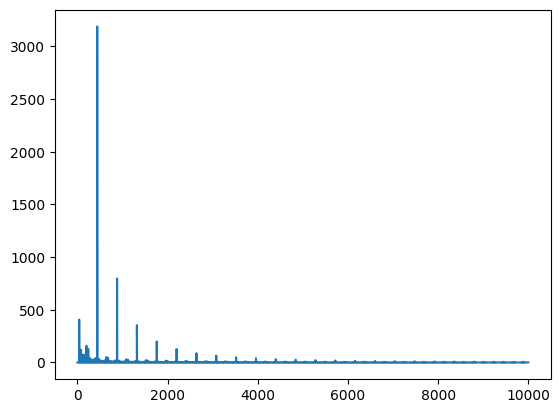

In [36]:
make_spectrum_fileter(saw_tooth_signal_spectrum)
saw_tooth_signal_wave = saw_tooth_signal_spectrum.make_wave()
saw_tooth_signal_spectrum.scale(freq)
saw_tooth_signal_spectrum.plot()

На низких частотах из-за биения получили артефакты, обрежем данные частоты.

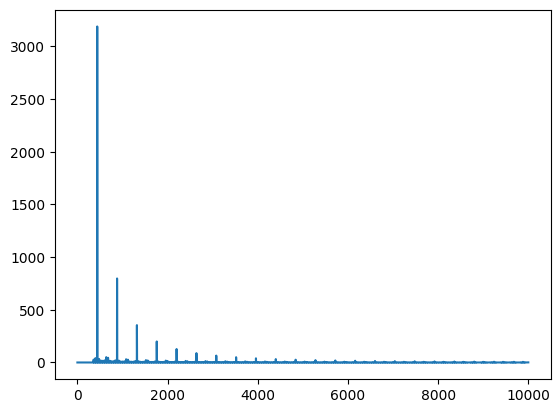

In [37]:
saw_tooth_signal_spectrum.high_pass(350)
saw_tooth_signal_spectrum.plot()

Теперь прослушаем полученный звук:

In [38]:
saw_tooth_signal_wave.make_audio()

И посмотрим его wave:

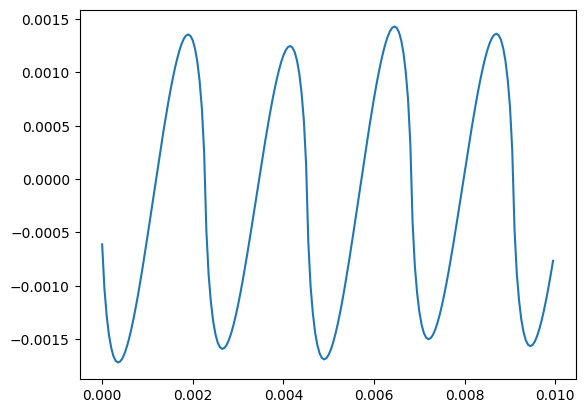

In [39]:
saw_tooth_signal_wave.segment(duration = 0.01).plot()